In [2]:
import seaborn
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Let’s make a request to this site to get the raw HTML, which we can later turn into a BeautifulSoup object.

The URL is:
https://content.codecademy.com/courses/beautifulsoup/cacao/index.html

You can pass this into the .get() method of the requests module to get the HTML.

In [3]:
webpage = requests.get("https://content.codecademy.com/courses/beautifulsoup/cacao/index.html")

Create a BeautifulSoup object called soup to traverse this HTML.

Use "html.parser" as the parser, and the content of the response you got from your request as the document.

In [4]:
soup = BeautifulSoup(webpage.content, "html.parser")

How many terrible chocolate bars are out there? And how many earned a perfect 5? Let’s make a histogram of this data.

The first thing to do is to put all of the ratings into a list.

Use a command on the soup object to get all of the tags that contain the ratings.

Create an empty list called ratings to store all the ratings in.

In [29]:
ratings_tags = soup.find_all(attrs={"class": "Rating"})
ratings= []

Loop through the ratings tags and get the text contained in each one. Add it to the ratings list.

As you do this, convert the rating to a float, so that the ratings list will be numerical. This should help with calculations later.

In [30]:
for text in ratings_tags[1:]:
    ratings.append(float(text.get_text()))
print(ratings)

[3.75, 2.75, 3.0, 3.5, 3.5, 2.75, 3.5, 3.5, 3.75, 4.0, 2.75, 3.0, 3.25, 3.75, 2.75, 3.0, 3.25, 4.0, 3.25, 3.5, 4.0, 3.5, 3.75, 3.75, 3.75, 2.75, 3.25, 3.5, 3.5, 2.75, 3.0, 3.0, 3.75, 2.75, 2.75, 2.75, 2.75, 3.0, 2.5, 2.5, 3.5, 3.5, 3.5, 3.5, 2.75, 3.0, 2.5, 2.5, 2.75, 2.5, 3.0, 3.25, 3.0, 3.25, 4.0, 3.75, 4.0, 3.0, 3.0, 2.75, 3.5, 3.0, 3.75, 3.0, 2.75, 2.75, 3.0, 3.25, 3.5, 3.0, 3.25, 3.25, 3.25, 3.25, 3.5, 3.75, 4.0, 4.0, 5.0, 3.0, 3.0, 3.5, 3.75, 4.0, 3.5, 3.5, 5.0, 4.0, 3.25, 2.75, 3.75, 3.75, 4.0, 3.0, 3.5, 3.0, 2.5, 2.75, 3.0, 3.5, 3.75, 3.5, 3.25, 3.25, 3.5, 3.75, 3.5, 4.0, 4.0, 3.75, 3.25, 3.25, 3.5, 3.5, 3.75, 3.5, 3.75, 4.0, 2.75, 3.25, 3.5, 3.25, 3.75, 4.0, 2.75, 1.75, 3.75, 3.25, 3.25, 3.5, 2.5, 2.75, 1.75, 3.0, 3.0, 3.25, 3.75, 2.75, 3.75, 3.75, 3.75, 3.75, 2.5, 3.0, 3.25, 3.5, 3.0, 2.5, 2.5, 2.75, 3.5, 3.5, 4.0, 3.25, 3.5, 3.75, 2.75, 3.5, 3.75, 3.25, 3.0, 3.25, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 3.5, 3.5, 3.25, 3.5, 2.75, 3.0, 3.5, 3.5, 3.5, 3.5, 4.0, 4.0, 3.75, 2.

Using Matplotlib, create a histogram of the ratings values:

plt.hist(ratings)
Remember to show the plot using plt.show()!

Your plot will show up at localhost in the web browser. You will have to navigate away from the cacao ratings webpage to see it.

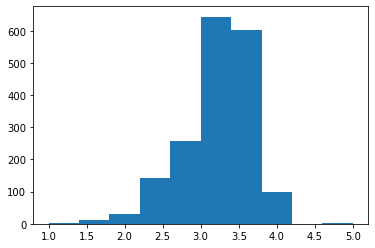

In [32]:
plt.hist(ratings)
plt.show()

We want to now find the 10 most highly rated chocolatiers. One way to do this is to make a DataFrame that has the chocolate companies in one column, and the ratings in another. Then, we can do a groupby to find the ones with the highest average rating.

First, let’s find all the tags on the webpage that contain the company names.

In [34]:
company_names_tags = soup.find_all(attrs={"class": "Company"})

#also soup.select(".Company")

Just like we did with ratings, we now want to make an empty list to hold company names.

Loop through the tags containing company names, and add the text from each tag to the list you just created.

In [35]:
company_names = []
for name in company_names_tags[1:]:
    company_names.append(name.get_text())
print(company_names)

['A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'Acalli', 'Acalli', 'Adi', 'Adi', 'Adi', 'Adi', 'Aequare (Gianduja)', 'Aequare (Gianduja)', 'Ah Cacao', "Akesson's (Pralus)", "Akesson's (Pralus)", "Akesson's (Pralus)", 'Alain Ducasse', 'Alain Ducasse', 'Alain Ducasse', 'Alain Ducasse', 'Alain Ducasse', 'Alexandre', 'Alexandre', 'Alexandre', 'Alexandre', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amatller (Simon Coll)', 'Amatller (Simon Coll)', 'Amatller (Simon Coll)', 'Amatller 

Create a DataFrame with a column “Company” corresponding to your companies list, and a column “Ratings” corresponding to your ratings list.

In [40]:
cacao_df = pd.DataFrame.from_dict({"Company": company_names, "Rating": ratings})

Use .groupby to group your DataFrame by Company and take the average of the grouped ratings.

Then, use the .nlargest command to get the 10 highest rated chocolate companies. Print them out.

In [43]:
mean_ratings = cacao_df.groupby("Company").Rating.mean()
ten_best = mean_ratings.nlargest(10)
print(ten_best)

Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Rating, dtype: float64


We want to see if the chocolate experts tend to rate chocolate bars with higher levels of cacoa to be better than those with lower levels of cacoa.

It looks like the cocoa percentages are in the table under the Cocoa Percent column (note we are looking at cocoa not cocao!).

Using the same methods you used in the last couple of tasks, create a list that contains all of the cocoa percentages. Store each percent as a float, after stripping off the % character.

In [45]:
cocoa_percent = soup.find_all(attrs={"class": "CocoaPercent"})
cocoa = []
for percent in cocoa_percent[1:]:
  cocoa.append(float(percent.string[:-1]))
print(cocoa)

[63.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 63.0, 70.0, 63.0, 70.0, 70.0, 60.0, 80.0, 88.0, 72.0, 55.0, 70.0, 70.0, 75.0, 75.0, 75.0, 65.0, 75.0, 75.0, 75.0, 75.0, 70.0, 70.0, 70.0, 70.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 80.0, 60.0, 60.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 85.0, 85.0, 72.0, 73.0, 64.0, 66.0, 75.0, 63.0, 70.0, 68.0, 70.0, 70.0, 75.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 63.0, 70.0, 66.0, 75.0, 85.0, 50.0, 75.0, 60.0, 75.0, 75.0, 75.0, 72.0, 75.0, 75.0, 70.0, 70.0, 73.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 73.0, 70.0, 68.0, 70.0, 70.0, 70.0, 70.0, 75.0, 70.0, 75.0, 72.0, 72.0, 72.0, 72.0, 100.0, 72.0, 72.0, 72.0, 72.0, 75.0, 72.0, 72.0, 80.0, 75.0, 72.0, 72.0, 72.0, 68.0, 72.0, 70.0, 77.0, 75.0, 70.0, 80.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 80.0, 65.0, 70.0, 65.0, 73.0, 72.0, 80.0, 70.0, 70.0, 90.0, 64

Add the cocoa percentages as a column called "CocoaPercentage" in the DataFrame that has companies and ratings in it.

In [47]:
cacao_df["CocoaPercentage"] = cocoa
cacao_df.head()

,Company,Rating,CocoaPercentage
0,A. Morin,3.75,63.0
1,A. Morin,2.75,70.0
2,A. Morin,3.00,70.0
3,A. Morin,3.50,70.0
4,A. Morin,3.50,70.0


Make a scatterplot of ratings (your_df.Rating) vs percentage of cocoa (your_df.CocoaPercentage).

You can do this in Matplotlib with these commands:

plt.scatter(df.CocoaPercentage, df.Rating)
plt.show()
Call plt.clf() to clear the figure between showing your histogram and this scatterplot.

Is there any correlation here? We can use some numpy commands to draw a line of best-fit over the scatterplot.

Copy this code and paste it after you create the scatterplot, but before you call .show():

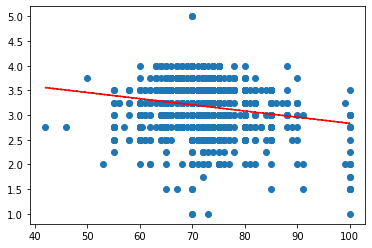

In [53]:
plt.scatter(cacao_df.CocoaPercentage, cacao_df.Rating)
z = np.polyfit(cacao_df.CocoaPercentage, cacao_df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(cacao_df.CocoaPercentage, line_function(cacao_df.CocoaPercentage), "r--")
plt.show()